In [72]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from statistics import mode
import numpy as np

# Pipeline Goal
1. Download Dataset from the website for our specified date/source period
2. Put into panda dataset for easy manipulation
3. Plot Data (ensure it works)
4. Data Manipulation
    a. Set Threshold value
    b. Get rid of 

## Putting Dataset into Pandas

In [140]:
columns = ["Year", "Day", "Hour", "DSCOV Bz_gse, nT", "WIND Bz_gse, nT" , "ACE Bz_gse, nT"]

file_path = "data/readings.lst"
df = pd.read_csv(file_path, sep = "\s+", header=None, names= columns)
df.head(50)

,Year,Day,Hour,"DSCOV Bz_gse, nT","WIND Bz_gse, nT","ACE Bz_gse, nT"
0,2016,156,0,999.9,-0.1,0.4
1,2016,156,1,1.1,1.1,1.1
2,2016,156,2,0.4,0.3,0.6
3,2016,156,3,0.3,0.1,-0.1
4,2016,156,4,-1.0,0.0,-0.6
5,2016,156,5,0.9,0.7,0.8
6,2016,156,6,-0.4,-1.3,-1.1
7,2016,156,7,0.9,1.5,1.1
8,2016,156,8,2.0,1.8,1.9
9,2016,156,9,3.1,2.6,3.1


In [141]:
# merge Year Day hour into one column
df["Date-Time"] = pd.to_datetime(df[["Year", "Day", "Hour"]].astype(str).agg('-'.join, axis=1), format="%Y-%j-%H")
df.set_index('Date-Time', inplace=True)
df[df['DSCOV Bz_gse, nT'] <= -10]

,Year,Day,Hour,"DSCOV Bz_gse, nT","WIND Bz_gse, nT","ACE Bz_gse, nT"
Date-Time,,,,,,
2016-08-02 21:00:00,2016,215,21,-10.3,-7.4,-9.9
2016-08-03 09:00:00,2016,216,9,-10.1,-10.3,-9.4
2016-08-23 19:00:00,2016,236,19,-12.2,-12.3,-12.2
2016-08-23 20:00:00,2016,236,20,-12.6,-11.4,-12.6
2016-10-13 07:00:00,2016,287,7,-13.1,-13.4,-13.3
2016-10-13 08:00:00,2016,287,8,-13.7,-13.9,-14.0
2016-10-13 09:00:00,2016,287,9,-15.6,-15.6,-14.7
2016-10-13 10:00:00,2016,287,10,-16.3,-16.5,-16.1
2016-10-13 11:00:00,2016,287,11,-17.5,-17.7,-17.0


In [32]:
# Remove all 999.99, replace with NaN
df.loc[df["DSCOV Bz_gse, nT"] == 999.9, "DSCOV Bz_gse, nT"] = None
df.loc[df["WIND Bz_gse, nT"] == 999.9, "WIND Bz_gse, nT"] = None
df.loc[df["ACE Bz_gse, nT"] == 999.9, "ACE Bz_gse, nT"] = None

df.head()

,Year,Day,Hour,"DSCOV Bz_gse, nT","WIND Bz_gse, nT","ACE Bz_gse, nT"
Date-Time,,,,,,
2016-06-04 00:00:00,2016,156,0,NaN,-0.1,0.4
2016-06-04 01:00:00,2016,156,1,1.1,1.1,1.1
2016-06-04 02:00:00,2016,156,2,0.4,0.3,0.6
2016-06-04 03:00:00,2016,156,3,0.3,0.1,-0.1
2016-06-04 04:00:00,2016,156,4,-1.0,0.0,-0.6


In [121]:
df_noNAN = df.copy().dropna()

df_noNAN

,Year,Day,Hour,"DSCOV Bz_gse, nT","WIND Bz_gse, nT","ACE Bz_gse, nT"
Date-Time,,,,,,
2016-06-04 01:00:00,2016,156,1,1.1,1.1,1.1
2016-06-04 02:00:00,2016,156,2,0.4,0.3,0.6
2016-06-04 03:00:00,2016,156,3,0.3,0.1,-0.1
2016-06-04 04:00:00,2016,156,4,-1.0,0.0,-0.6
2016-06-04 05:00:00,2016,156,5,0.9,0.7,0.8
...,...,...,...,...,...,...
2019-05-08 08:00:00,2019,128,8,1.4,1.9,1.6
2019-05-08 15:00:00,2019,128,15,1.3,1.3,1.4
2019-05-08 16:00:00,2019,128,16,1.2,1.2,1.3


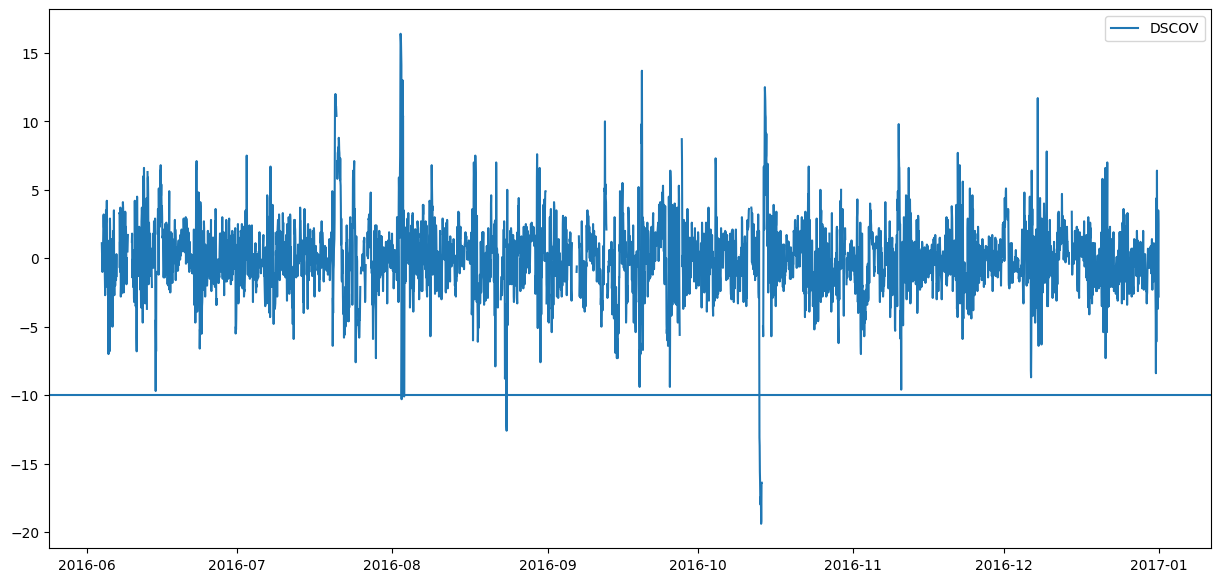

In [46]:
plt.figure(figsize=(15, 7))
plt.plot(df["DSCOV Bz_gse, nT"].loc[df['Year']==2016], label = "DSCOV")
# plt.plot(df["WIND Bz_gse, nT"], label = "WIND")
# plt.plot(df["ACE Bz_gse, nT"], label = "ACE")

plt.axhline(y=-10)
plt.legend()
plt.show()

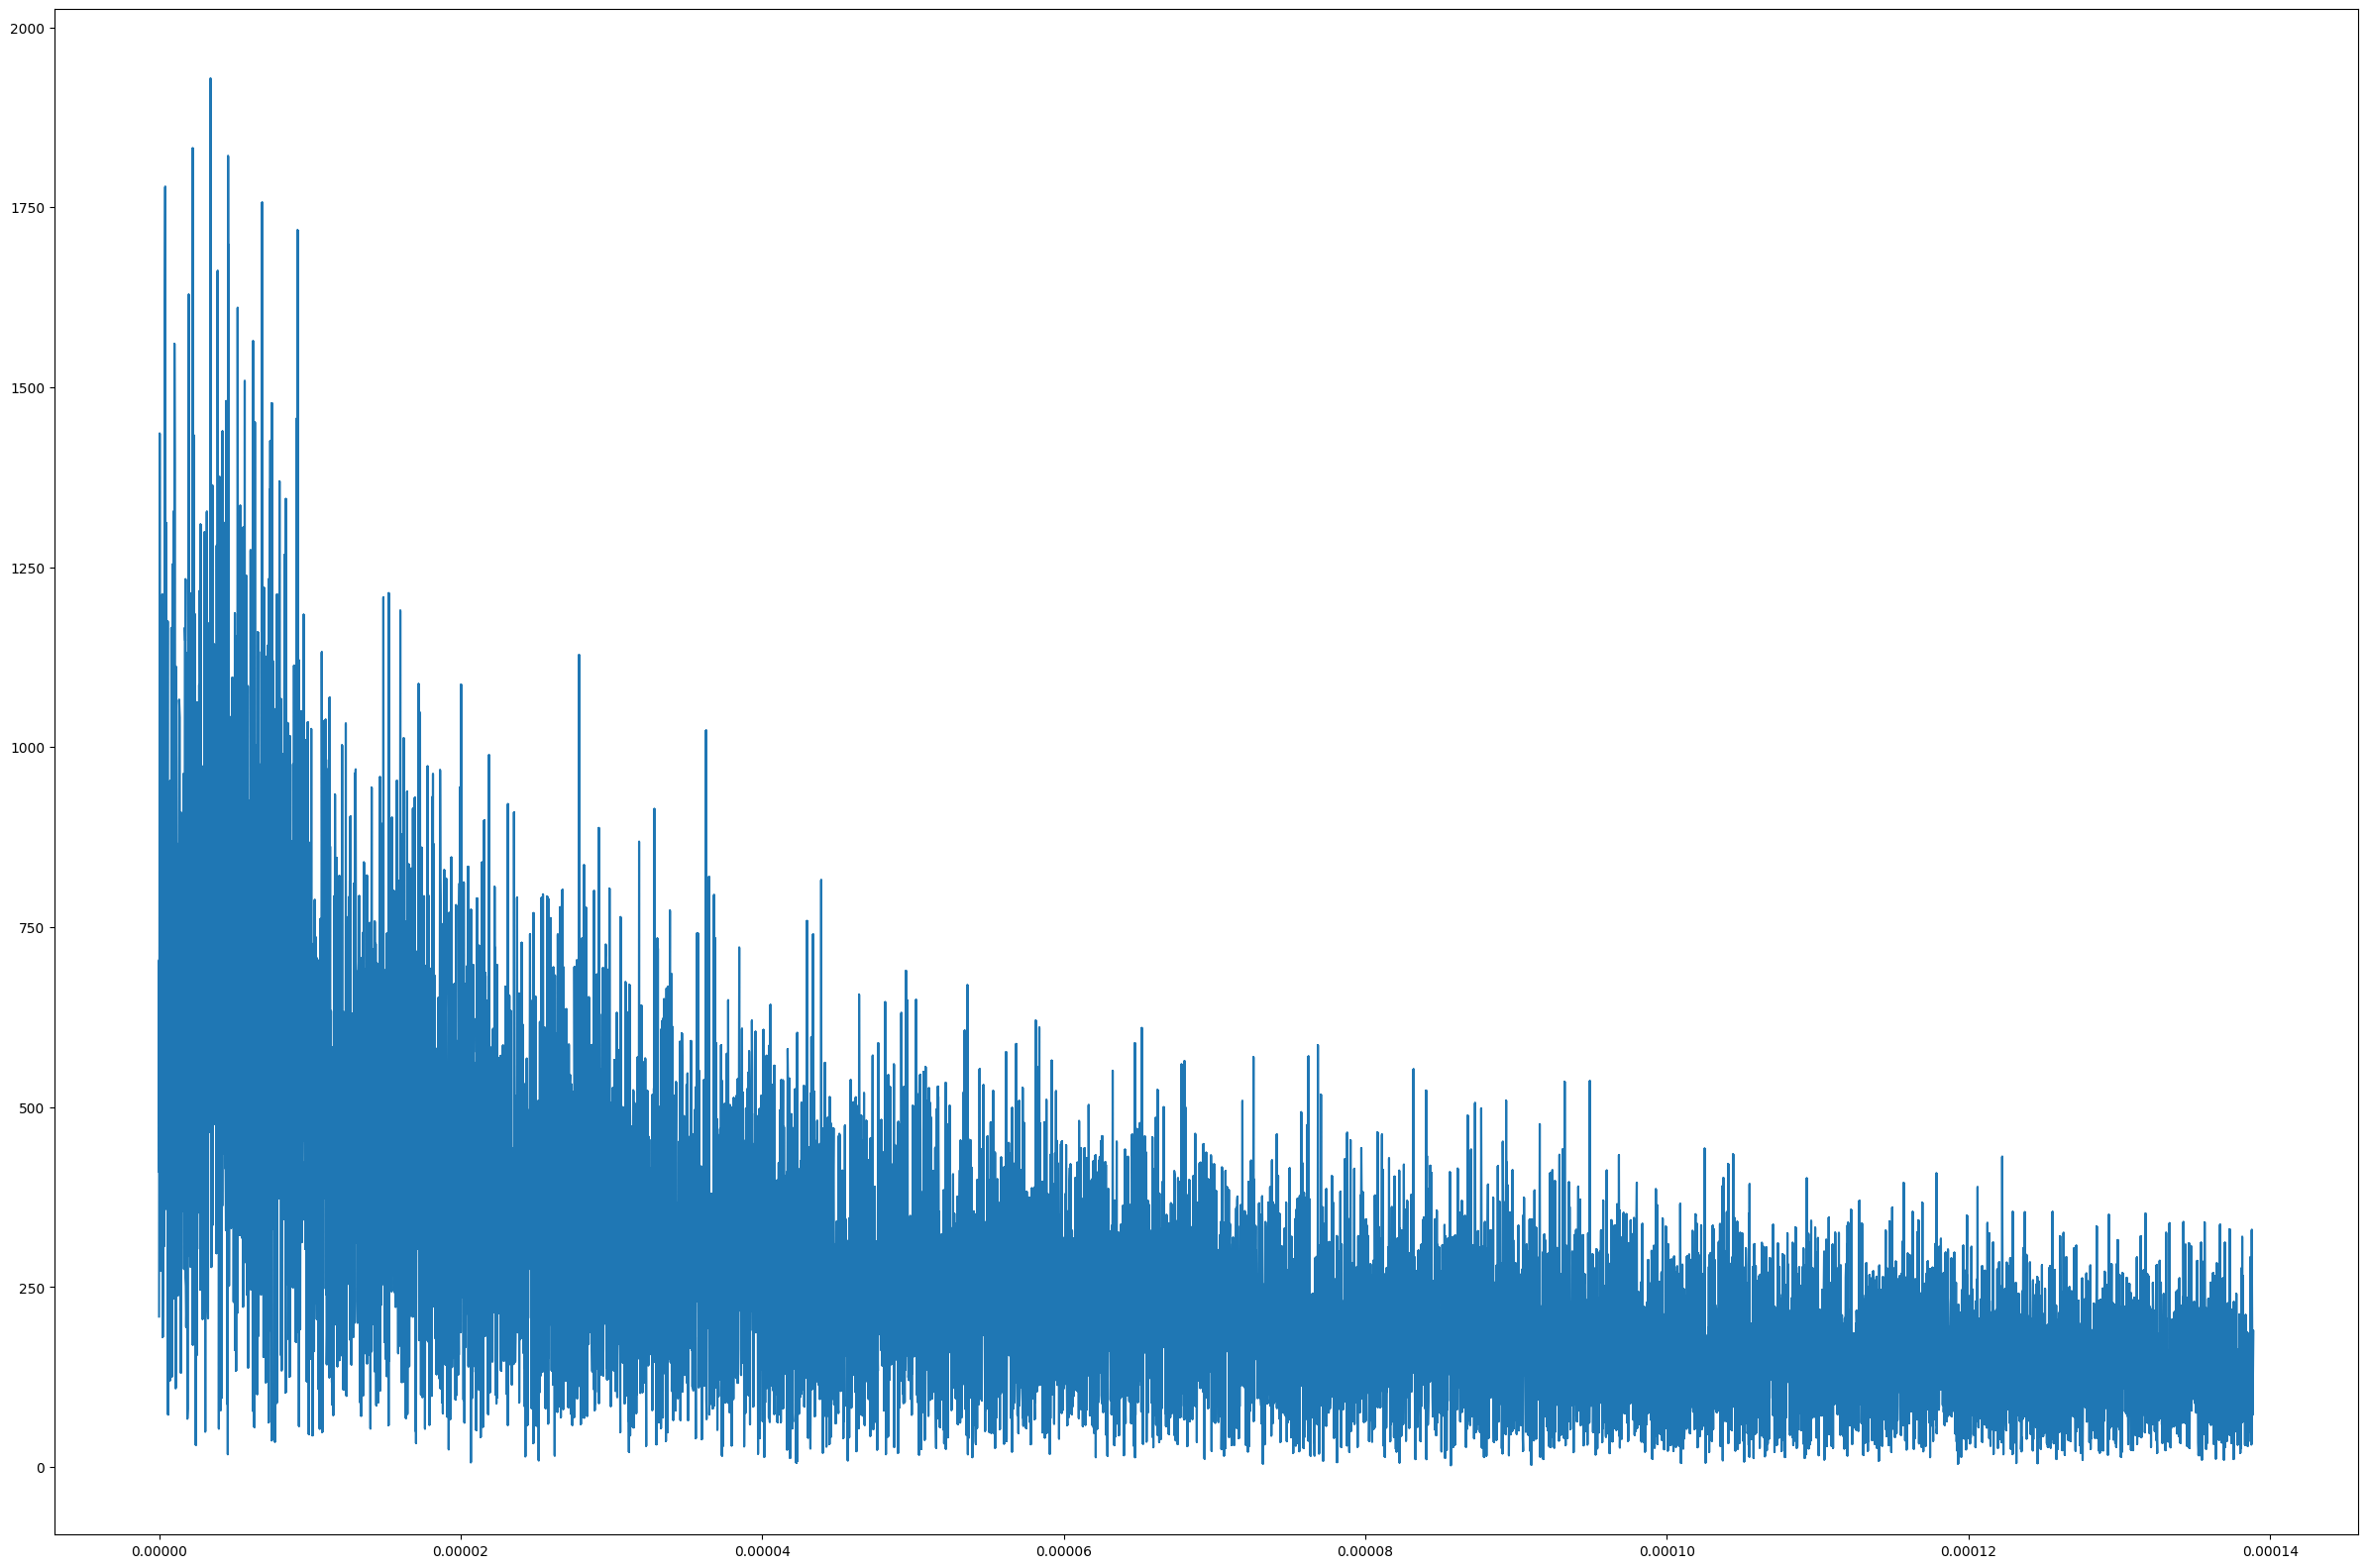

In [133]:
from scipy.fft import fft, fftfreq
sample_rate = 1/3600
y = df_noNAN['DSCOV Bz_gse, nT']
duration = len(y)*3600
N = int(sample_rate*duration)
yf = fft(np.array(y))
xf = fftfreq(N, 1 / sample_rate)

f=plt.figure()
f.set_figwidth(30)
f.set_figheight(20)
plt.plot(np.abs(xf), np.abs(yf))
#plt.rcParams['figure.figsize']=[100,10]
plt.show()

In [125]:
print(N)

22049.0


/Users/eunice/opt/anaconda3/envs/Py3104/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/eunice/opt/anaconda3/envs/Py3104/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


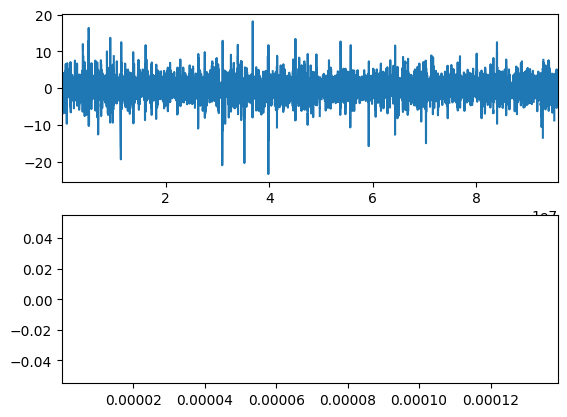

In [112]:
sample_period = 3600
y = df['DSCOV Bz_gse, nT']
a = 3600*len(y)
t = np.arange(1,a,sample_period)
f = df['DSCOV Bz_gse, nT']

n = len(y)
fhat = np.fft.fft(f, n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(sample_period*n))*np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, f)
plt.xlim(t[0], t[-1])

plt.sca(axs[1])
plt.plot(freq[L], PSD[L])
plt.xlim(freq[L[0]], freq[L[-1]])
plt.show()


# find the time period for it to repeat: 11 yrs? (DISCOVR dun hv)
# 

In [113]:
fhat

array([nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj])

In [105]:
print(t)
print(len(y))

[    0     1     2 ... 26589 26590 26591]
26592


# Visualization

- Look at plotting average, median, range
- How many are NaN, etc

# Thresholding
Thresholding, and oogabooga, average time based on threshold

In [137]:
df2 = df.copy()

False


TimedeltaIndex(['0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00',
                ...
                '0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00'],
               dtype='timedelta64[ns]', name='Date-Time', length=26591, freq=None)

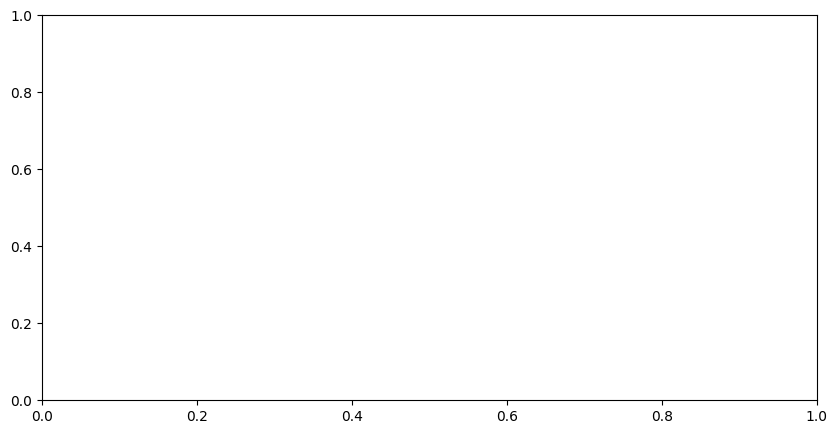

In [138]:
# thresholds = [-2, -6, -10] #in nT
thresholds = [-10]
fig, axs = plt.subplots(len(thresholds), figsize=(10, 5*len(thresholds)))
for i, threshold in enumerate(thresholds):
    for y in range(len())
    DSCOV_IMF_times = df2.index[[df2["DSCOV Bz_gse, nT"] <= threshold] & [df2["DSCOV Bz_gse, nT"] <= threshold]]
    DSCOV_IMF_time_diffs = df2.index[1:] - df2.index[:-1]
    # DSCOV_IMF_times = df2.index[df2["DSCOV Bz_gse, nT"] <= threshold]
    # print("Number of IMF below {threshold} nT threshold: ", len(DSCOV_IMF_time_diffs))

    """DSCOV_IMF_time_diffs_hrs = DSCOV_IMF_time_diffs.total_seconds() / 3600  
    axs.hist(DSCOV_IMF_time_diffs_hrs, bins=30, edgecolor='k', alpha=0.7)
    axs.set_title(f'Histogram of Time Between events (Threshold: {threshold} nT), n={len(DSCOV_IMF_time_diffs)}')
    axs.set_xlabel('Time Difference (hours)')
    axs.set_ylabel('Frequency')
    print(DSCOV_IMF_time_diffs_hrs)"""
DSCOV_IMF_time_diffs
#plt.tight_layout()
#plt.show()

In [134]:
DSCOV_IMF_times

DatetimeIndex(['2016-08-02 21:00:00', '2016-08-03 09:00:00',
               '2016-08-23 19:00:00', '2016-08-23 20:00:00',
               '2016-10-13 07:00:00', '2016-10-13 08:00:00',
               '2016-10-13 09:00:00', '2016-10-13 10:00:00',
               '2016-10-13 11:00:00', '2016-10-13 12:00:00',
               '2016-10-13 13:00:00', '2016-10-13 14:00:00',
               '2016-10-13 15:00:00', '2016-10-13 16:00:00',
               '2016-10-13 17:00:00', '2016-10-13 18:00:00',
               '2017-04-04 05:00:00', '2017-05-27 22:00:00',
               '2017-05-27 23:00:00', '2017-05-28 00:00:00',
               '2017-05-28 01:00:00', '2017-05-28 02:00:00',
               '2017-05-28 03:00:00', '2017-05-28 04:00:00',
               '2017-05-28 05:00:00', '2017-05-28 06:00:00',
               '2017-05-28 07:00:00', '2017-05-28 08:00:00',
               '2017-05-28 09:00:00', '2017-05-29 14:00:00',
               '2017-07-16 11:00:00', '2017-07-16 12:00:00',
               '2017-09-

1.0
[0.         0.01666667 0.03333333 0.05       0.06666667 0.08333333
 0.1        0.11666667 0.13333333 0.15       0.16666667 0.18333333
 0.2        0.21666667 0.23333333 0.25       0.26666667 0.28333333
 0.3        0.31666667 0.33333333 0.35       0.36666667 0.38333333
 0.4        0.41666667 0.43333333 0.45       0.46666667 0.48333333
 0.5        0.51666667 0.53333333 0.55       0.56666667 0.58333333
 0.6        0.61666667 0.63333333 0.65       0.66666667 0.68333333
 0.7        0.71666667 0.73333333 0.75       0.76666667 0.78333333
 0.8        0.81666667 0.83333333 0.85       0.86666667 0.88333333
 0.9        0.91666667 0.93333333 0.95       0.96666667 0.98333333]
180
30


Text(0, 0.5, 'FFT Amplitude |X(freq)|')

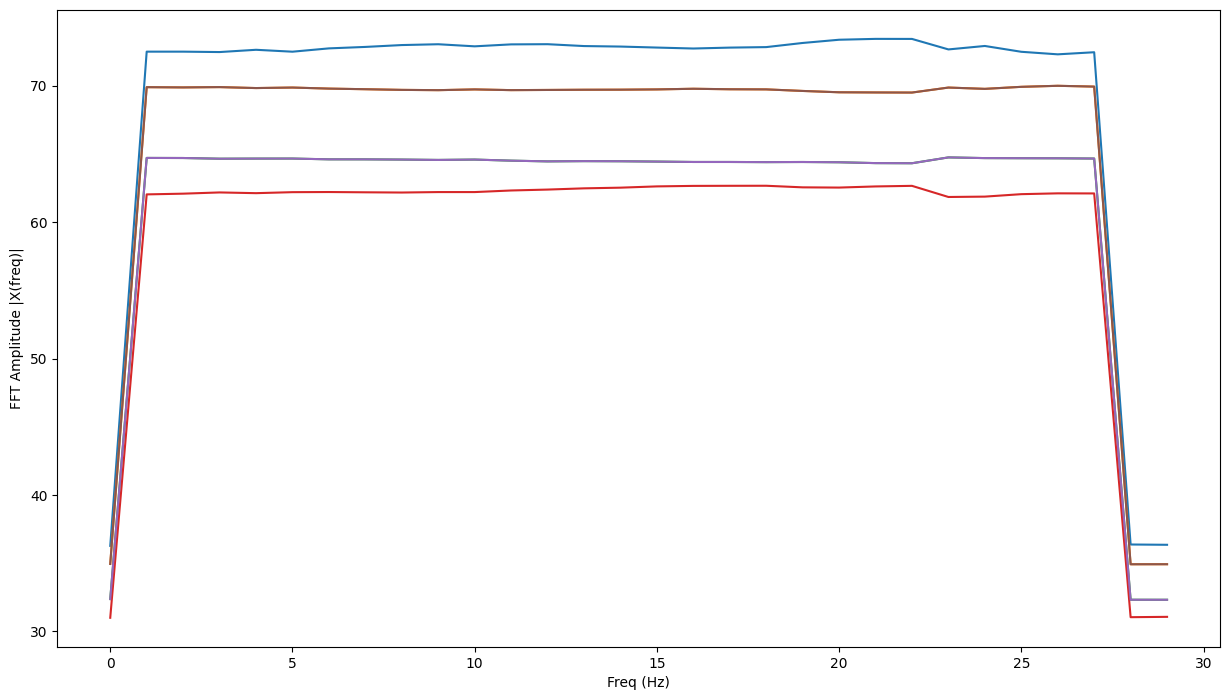

In [73]:
DSCOV_IMF_time_diffs_hrs
print(mode(DSCOV_IMF_time_diffs_hrs))
# As mode is 1 day, 1 day is the period 
# Freq = 1/P = 1 per day

y = df2[df2["DSCOV Bz_gse, nT"] <= 10]

# Find the period (p)
TT = mode(DSCOV_IMF_time_diffs_hrs)

# Find the overall time period
L = len(DSCOV_IMF_times)

# Find the frequency
Fs = L/TT

# Find the period
P = 1/Fs

t = np.arange(0, L)*P
print(t)

# fft
X = np.fft.fft(y)
P2 = abs(X/L)
P1 = P2[0:int(L/2)]

P1[1:-2] = 2*P1[1:-2]
print(np.size(P1))

freq = Fs*np.arange(0, L/2)/L
print(np.size(freq))

# Plot graphs
plt.figure(figsize=(15, 8.27))
plt.plot(freq, P1)
#plt.plot(freq, np.abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(0, 2)
#plt.ylim(0, 0.05)

1.0
24492
24492.0
4.082965866405357e-05
[0.00000000e+00 4.08296587e-05 8.16593173e-05 ... 9.99877511e-01
 9.99918341e-01 9.99959170e-01]
59
12246


ValueError: x and y must have same first dimension, but have shapes (12246,) and (59,)

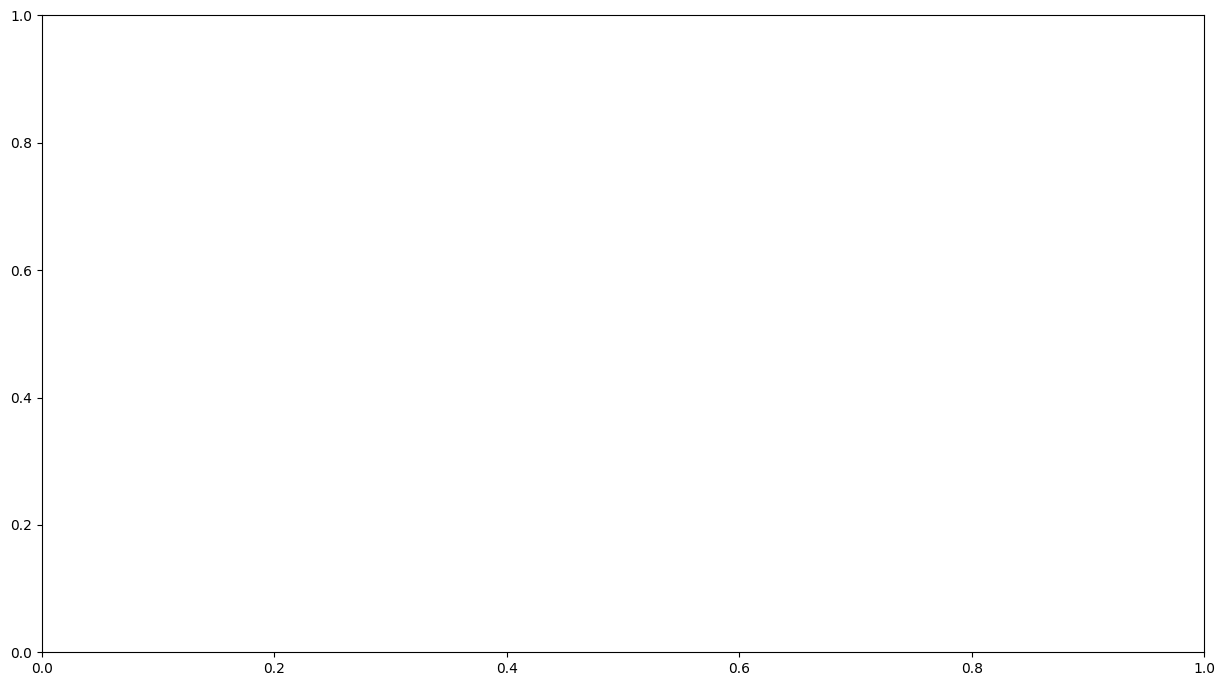

In [79]:
# DSCOV_IMF_time_diffs_hrs
# print(mode(DSCOV_IMF_time_diffs_hrs))
# As mode is 1 day, 1 day is the period 
# Freq = 1/P = 1 per day

y = DSCOV_IMF_time_diffs_hrs

# Find the period (p)
TT = mode(DSCOV_IMF_time_diffs_hrs)
print(TT)

# Find the overall time period
df_occur = df2[df2["DSCOV Bz_gse, nT"] <= 10]
print(df_occur)
L = len()
print(L)

# Find the frequency
Fs = L/TT
print(Fs)

# Find the period
P = 1/Fs
print(P)

t = np.arange(0, L)*P
print(t)

# fft
X = np.fft.fft(y)
P2 = abs(X/L)
P1 = P2[0:int(L/2)]

P1[1:-2] = 2*P1[1:-2]
print(np.size(P1))

freq = Fs*np.arange(0, L/2)/L
print(np.size(freq))

# Plot graphs
plt.figure(figsize=(15, 8.27))
plt.plot(freq, P1)
#plt.plot(freq, np.abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

In [97]:
df_occur = df2[df2["DSCOV Bz_gse, nT"] <= -10]
len(df_occur['Year'])
time_diff= []
for i in range(len(df_occur['Year'])-1):
    diff = df_occur['Hour'].iloc[i+1] - df_occur['Hour'].iloc[i]
    time_diff.append(diff)

len(time_diff)

59

In [98]:
len(DSCOV_IMF_time_diffs_hrs)

59

In [ ]:
df_occur = df2[df2["DSCOV Bz_gse, nT"] <= -10]
len(df_occur['Year'])
time_diff= []
for i in range(len(df_occur['Year'])-1):
    diff = df_occur['Hour'].iloc[i+1] - df_occur['Hour'].iloc[i]
    time_diff.append(diff)

    if (df_occur['Hour'].iloc[i+1] - df_occur['Hour'].iloc[i] == 1) or (df_occur['Hour'].iloc[i+1] - df_occur['Hour'].iloc[i] == 23):
        number.append(1)
number
len(number)

In [87]:
df_occur

,Year,Day,Hour,"DSCOV Bz_gse, nT","WIND Bz_gse, nT","ACE Bz_gse, nT"
Date-Time,,,,,,
2016-08-02 21:00:00,2016,215,21,-10.3,-7.4,-9.9
2016-08-03 09:00:00,2016,216,9,-10.1,-10.3,-9.4
2016-08-23 19:00:00,2016,236,19,-12.2,-12.3,-12.2
2016-08-23 20:00:00,2016,236,20,-12.6,-11.4,-12.6
2016-10-13 07:00:00,2016,287,7,-13.1,-13.4,-13.3
2016-10-13 08:00:00,2016,287,8,-13.7,-13.9,-14.0
2016-10-13 09:00:00,2016,287,9,-15.6,-15.6,-14.7
2016-10-13 10:00:00,2016,287,10,-16.3,-16.5,-16.1
2016-10-13 11:00:00,2016,287,11,-17.5,-17.7,-17.0


In [54]:
df_event = df2.loc[df2["DSCOV Bz_gse, nT"] <= threshold]
df_event['DSCOV Bz_gse, nT']

Date-Time
2016-08-02 21:00:00   -10.3
2016-08-03 09:00:00   -10.1
2016-08-23 19:00:00   -12.2
2016-08-23 20:00:00   -12.6
2016-10-13 07:00:00   -13.1
2016-10-13 08:00:00   -13.7
2016-10-13 09:00:00   -15.6
2016-10-13 10:00:00   -16.3
2016-10-13 11:00:00   -17.5
2016-10-13 12:00:00   -18.0
2016-10-13 13:00:00   -17.7
2016-10-13 14:00:00   -17.4
2016-10-13 15:00:00   -19.4
2016-10-13 16:00:00   -19.2
2016-10-13 17:00:00   -16.4
2016-10-13 18:00:00   -16.4
2017-04-04 05:00:00   -11.0
2017-05-27 22:00:00   -16.4
2017-05-27 23:00:00   -19.3
2017-05-28 00:00:00   -21.0
2017-05-28 01:00:00   -19.7
2017-05-28 02:00:00   -19.0
2017-05-28 03:00:00   -18.2
2017-05-28 04:00:00   -17.0
2017-05-28 05:00:00   -15.9
2017-05-28 06:00:00   -15.1
2017-05-28 07:00:00   -11.6
2017-05-28 08:00:00   -11.2
2017-05-28 09:00:00   -11.0
2017-05-29 14:00:00   -11.5
2017-07-16 11:00:00   -20.4
2017-07-16 12:00:00   -15.8
2017-09-07 23:00:00   -21.9
2017-09-08 00:00:00   -23.4
2017-09-08 01:00:00   -16.5
2017-09-08

In [56]:
a = df2.index[df2["DSCOV Bz_gse, nT"] <= threshold]
b = DSCOV_IMF_times[1:] - DSCOV_IMF_times[:-1]
b

TimedeltaIndex([ '0 days 05:00:00',  '5 days 10:00:00',  '3 days 19:00:00',
                 '0 days 02:00:00',  '8 days 17:00:00', '26 days 13:00:00',
                 '4 days 14:00:00',  '4 days 01:00:00',  '5 days 03:00:00',
                 '0 days 01:00:00',
                ...
                 '0 days 01:00:00',  '0 days 01:00:00',  '0 days 01:00:00',
                 '0 days 03:00:00',  '2 days 11:00:00',  '0 days 01:00:00',
                '13 days 00:00:00',  '8 days 08:00:00',  '0 days 01:00:00',
                 '4 days 02:00:00'],
               dtype='timedelta64[ns]', name='Date-Time', length=244, freq=None)

# Perform Fourier transform using the frequency data from Khaled

[]

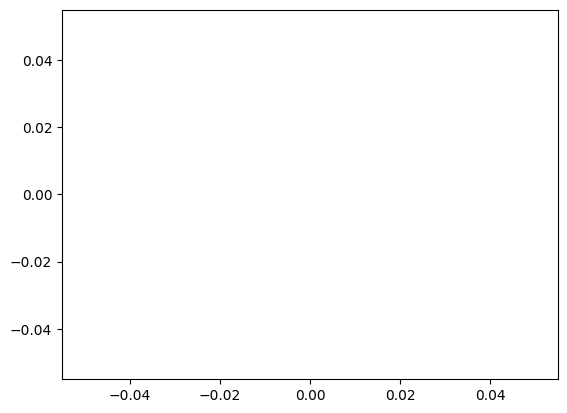

In [50]:
DSCOV_IMF_times = df2.index[ df2["DSCOV Bz_gse, nT"] < -6]
plt.plot()

# Research


In [51]:
#threshold: -10nT --> https://www.spaceweatherlive.com/en/help/the-interplanetary-magnetic-field-imf.html
# when DSCOVR B > 25nT: sm WIND measurements are significantly smaller. 
# ACE & Wind are universally consistent, we suggest using ACE or Wind measurement of the
# magnetic field when the apparent field strength from DSCOVR is above 25nT

# lists of dates of CME (coronal mass ejection) --> we can determine the threshold using that
